In [5]:
%load_ext autoreload
%autoreload 2

import sys, os
import lightning.pytorch as pl
import torch
from matplotlib import pyplot as plt
import numpy as np
import pickle

sys.path.insert(1, sys.path[0] + '/..')
from src.data.datamodule import DataModule
from src.model.setup import setup_model
from src.misc.utils import set_seed_and_precision
from src.misc.files import SetupArgs

from src.run import parse_option, main
args = parse_option(notebook=True)
args.data_dir = '../data_dev'
args.version = 'version_sam'
args.num_workers = 8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Train

In [2]:
# args.train, args.predict = True, False
# args.splits = ['train', 'val']
# main(args)

Predict with custom loading

In [3]:
# setup_args = SetupArgs(**{
#     'net' : 'unet3d',
#     'predict' : True,
#     'train' : False,
#     'log_dir' : '../logs',
#     'version' : 'version_sam',
# })

# trained_unet = setup_model(setup_args)

In [10]:
# x = torch.randn(1, 32, 32, 32) # a random image
# y = torch.tensor([-1]) # a random label
# batch = (x, y)
# trained_unet(batch)

Predict directly in run

In [7]:
args.train, args.predict = False, True
args.splits = ['val']
main(args)

Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 7/7 [00:09<00:00,  1.34s/it]


Post process

In [20]:
from src.postprocess import main as postprocess_main, parse_option as postprocess_parse_option
postprocess_args = postprocess_parse_option(notebook=True)
postprocess_args.split = 'val'
postprocess_args.prediction_box_dir = os.path.join(args.log_dir, args.net, args.version, 'segmentations')
postprocess_args.original_image_dir = args.data_dir
postprocess_args.save_dir = os.path.join(args.log_dir, 'submissions', args.version)

In [29]:
pred_arr = postprocess_main(postprocess_args)

  0%|          | 0/2 [00:02<?, ?it/s]


(array([64307.,  2145.,  1367.,  1073.,   881.,   822.,   799.,   853.,
         1130.,  4562.]),
 array([0.00656139, 0.10590525, 0.20524912, 0.30459297, 0.40393683,
        0.5032807 , 0.60262454, 0.70196843, 0.80131227, 0.90065616,
        1.        ]),
 <BarContainer object of 10 artists>)

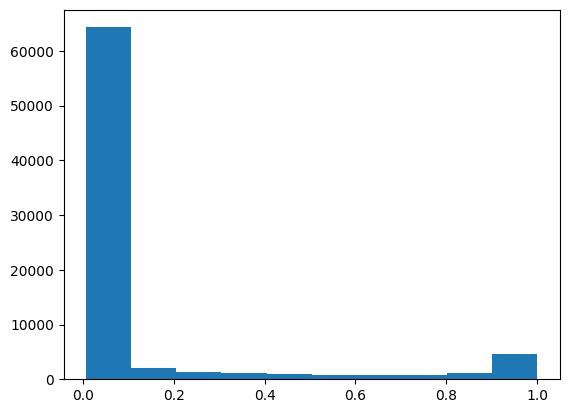

In [27]:
x = pred_arr.flatten()

#drop zeros from x
x = x[x != 0]
plt.hist(x)

In [11]:
pred_dir = os.path.join(args.log_dir, args.net, args.version, 'segmentations')
pred_dir

'../logs/unet3d/version_sam/segmentations'

In [9]:
pred_dir

'../logs/unet3d/version_sam'

In [28]:
# load preds.pkl from pred_dir
with open(os.path.join(pred_dir, 'preds.pkl'), 'rb') as f:
    preds = pickle.load(f)

In [29]:
preds[0]

(tensor([[[[0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           ...,
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870]],
 
          [[0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           ...,
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870]],
 
          [[0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.4870, 0.4870,  ..., 0.4870, 0.4870, 0.4870],
           [0.4870, 0.48

### Dev